In [11]:
import pandas as pd
from collections import *
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import RandomizedPCA
from pylab import *

%matplotlib inline

In [3]:
df = pd.read_csv("../../data/meta/UCSD-Guardian.csv")
print df.shape

(2915, 46)


In [4]:
df.columns

Index([u'Object Unique ID', u'Level', u'File name', u'File use',
       u'Type of Resource', u'Language', u'Title', u'Title.1', u'Subtitle',
       u'Translation', u'Variant', u'Variant.1', u'Variant.2', u'Variant.3',
       u'Variant.4', u'Variant.5', u'Variant.6', u'Variant.7', u'Variant.8',
       u'Variant.9', u'Variant.10', u'Variant.11', u'Variant.12',
       u'Variant.13', u'Variant.14', u'Variant.15', u'Begin date',
       u'Begin date.1', u'Date:creation', u'Date:creation.1', u'End date',
       u'End date.1', u'File name 2', u'File use 2', u'Identifier:filename',
       u'Identifier:filename.1', u'Note:local attribution', u'Note:note',
       u'Note:note.1', u'Note:note.2', u'Note:note.3', u'Note:publication',
       u'Note:publication.1', u'Note:series', u'Note:series.1',
       u'Subject:topic'],
      dtype='object')

In [5]:
df_rel = df[['Object Unique ID', 'Begin date', 'Date:creation', 'End date', 'Title']]
df_rel.head(20)

,Object Unique ID,Begin date,Date:creation,End date,Title
0,http://library.ucsd.edu/ark:/20775/bb4813423q,1994-02-10,"February 10, 1994",1994-02-10,UCSD Guardian
1,http://library.ucsd.edu/ark:/20775/bb8943155k,1979-05-07,"May 7, 1979",1979-05-07,Guardian
2,http://library.ucsd.edu/ark:/20775/bb47792902,1987-05-21,"May 21, 1987",1987-05-21,UCSD Guardian
3,http://library.ucsd.edu/ark:/20775/bb75779516,1987-05-07,"May 7, 1987",1987-05-07,UCSD Guardian
4,http://library.ucsd.edu/ark:/20775/bb0479396b,2014-01-16,"January 16, 2014",2014-01-16,UCSD Guardian
5,http://library.ucsd.edu/ark:/20775/bb23906782,2014-03-10,"March 10, 2014",2014-03-10,UCSD Guardian
6,http://library.ucsd.edu/ark:/20775/bb86701140,1977-03-16,"March 16, 1977",1977-03-16,Triton Times
7,http://library.ucsd.edu/ark:/20775/bb5837320f,1981-01-05,"January 5, 1981",1981-01-05,The Guardian
8,http://library.ucsd.edu/ark:/20775/bb2014764j,1990-10-15,"October 15, 1990",1990-10-15,UCSD Guardian
9,http://library.ucsd.edu/ark:/20775/bb32093141,2000-10-26,"October 26, 2000",2000-10-26,UCSD Guardian


In [6]:
filenames = ["../../data/Fulltext/UCSD Guardian/" + f.split("20775/")[-1] + '-1.pdf.txt' for f in df['Object Unique ID'].tolist()]

In [7]:
print 'We have', len(filenames), 'files'
filenames[:4]

We have 2915 files


['../../data/Fulltext/UCSD Guardian/bb4813423q-1.pdf.txt',
 '../../data/Fulltext/UCSD Guardian/bb8943155k-1.pdf.txt',
 '../../data/Fulltext/UCSD Guardian/bb47792902-1.pdf.txt',
 '../../data/Fulltext/UCSD Guardian/bb75779516-1.pdf.txt']

In [9]:
docs = []
for filename in filenames:
    txt = open(filename)
    docs.append(txt.read())

In [10]:
count_vect = CountVectorizer(min_df = 20, analyzer = "word", stop_words="english")
X_train_counts = count_vect.fit_transform(docs)
print X_train_counts.shape

tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print X_train_tf.shape

(2915, 66786)
(2915, 66786)


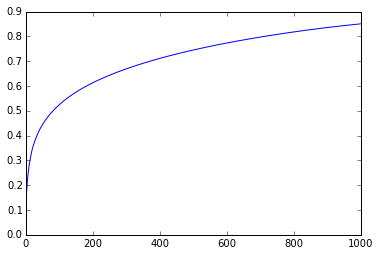

In [14]:
pca = RandomizedPCA(n_components=1000)
docs_pca = pca.fit_transform(X_train_tf.todense())

plot(cumsum(pca.explained_variance_ratio_))

In [15]:
sum(pca.explained_variance_ratio_)

0.85055634637198718

In [16]:
docs_pca_df = pd.DataFrame(docs_pca)
docs_pca_df.rename(columns=lambda x: "pc" + str(x), inplace=True)
docs_pca_df.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,...,pc990,pc991,pc992,pc993,pc994,pc995,pc996,pc997,pc998,pc999
0,0.098177,-0.088026,0.128369,-0.078318,-0.075725,-0.009920,0.064752,0.002347,-0.008448,-0.005685,...,-0.005002,-0.000740,-0.012701,-0.015801,0.011209,-0.000672,-0.000110,-0.002132,0.002120,0.000220
1,-0.199665,0.129619,0.072116,0.083586,0.118982,-0.062301,-0.096391,-0.056454,0.056947,0.084836,...,0.001681,-0.006429,-0.000783,0.011319,-0.001941,-0.002907,-0.006667,0.005068,-0.012796,-0.013687
2,-0.117474,-0.009286,0.031177,-0.043694,-0.007033,0.063374,-0.015958,-0.024055,0.008164,-0.082413,...,-0.003979,-0.000069,0.005815,0.001887,0.000107,-0.002422,-0.004211,-0.000938,0.004916,0.006575
3,-0.347303,-0.221751,-0.068345,0.004822,0.032669,-0.000037,-0.112055,-0.048304,0.070230,-0.077617,...,-0.002484,-0.001381,-0.005349,-0.001592,0.003178,0.004923,0.011909,-0.002805,-0.000229,0.000116
4,0.265236,0.079703,-0.222281,0.144573,-0.085419,-0.045643,0.007472,-0.097556,0.109705,-0.017744,...,0.010914,0.006691,-0.006137,0.013859,-0.006840,-0.003962,0.007543,-0.002665,-0.016980,-0.002364


In [23]:
res = df_rel.join(docs_pca_df)
res.head()

,Object Unique ID,Begin date,Date:creation,End date,Title,pc0,pc1,pc2,pc3,pc4,...,pc990,pc991,pc992,pc993,pc994,pc995,pc996,pc997,pc998,pc999
0,http://library.ucsd.edu/ark:/20775/bb4813423q,1994-02-10,"February 10, 1994",1994-02-10,UCSD Guardian,0.098177,-0.088026,0.128369,-0.078318,-0.075725,...,-0.005002,-0.000740,-0.012701,-0.015801,0.011209,-0.000672,-0.000110,-0.002132,0.002120,0.000220
1,http://library.ucsd.edu/ark:/20775/bb8943155k,1979-05-07,"May 7, 1979",1979-05-07,Guardian,-0.199665,0.129619,0.072116,0.083586,0.118982,...,0.001681,-0.006429,-0.000783,0.011319,-0.001941,-0.002907,-0.006667,0.005068,-0.012796,-0.013687
2,http://library.ucsd.edu/ark:/20775/bb47792902,1987-05-21,"May 21, 1987",1987-05-21,UCSD Guardian,-0.117474,-0.009286,0.031177,-0.043694,-0.007033,...,-0.003979,-0.000069,0.005815,0.001887,0.000107,-0.002422,-0.004211,-0.000938,0.004916,0.006575
3,http://library.ucsd.edu/ark:/20775/bb75779516,1987-05-07,"May 7, 1987",1987-05-07,UCSD Guardian,-0.347303,-0.221751,-0.068345,0.004822,0.032669,...,-0.002484,-0.001381,-0.005349,-0.001592,0.003178,0.004923,0.011909,-0.002805,-0.000229,0.000116
4,http://library.ucsd.edu/ark:/20775/bb0479396b,2014-01-16,"January 16, 2014",2014-01-16,UCSD Guardian,0.265236,0.079703,-0.222281,0.144573,-0.085419,...,0.010914,0.006691,-0.006137,0.013859,-0.006840,-0.003962,0.007543,-0.002665,-0.016980,-0.002364


In [25]:
res.to_csv("../../results/guardian_tfidf.csv")